<a href="https://colab.research.google.com/github/Isafon/ECE528/blob/main/ECE528_ASN4_Q1_univariate_time_series_1_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sys
import sklearn
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
from keras import layers

import numpy as np
from numpy import load
import os

# to make this notebook's output stable across runs
np.random.seed(42)
keras.utils.set_random_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load dataset

In [4]:
np.random.seed(42)

n_steps = 60
series = load('univariate-time-series-1-step.npy')

X_train, y_train = series[:9000, :n_steps], series[:9000, -1] # -1 references the last column
X_valid, y_valid = series[9000:11000, :n_steps], series[9000:11000, -1]
X_test, y_test = series[11000:, :n_steps], series[11000:, -1]


In [5]:
series.shape

(12000, 61, 1)

In [6]:
X_train.shape, y_train.shape

((9000, 60, 1), (9000, 1))

Saving figure time_series_plot


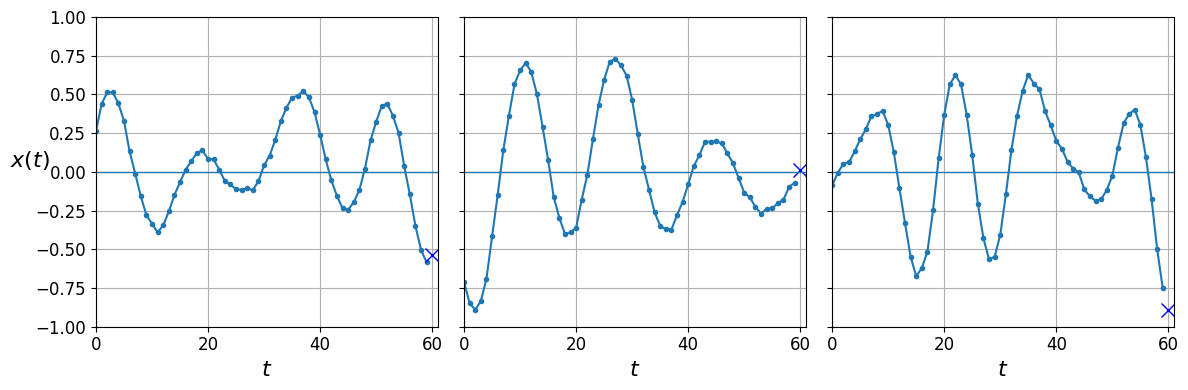

In [7]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
save_fig("time_series_plot")
plt.show()

Linear predictions:

In [8]:
np.random.seed(42)
keras.utils.set_random_seed(42)

#Replace this with your RNN code

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[60, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2129 - val_loss: 0.0705
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0547 - val_loss: 0.0377
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0322 - val_loss: 0.0243
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0217 - val_loss: 0.0167
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0154 - val_loss: 0.0122
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0116 - val_loss: 0.0094
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0091 - val_loss: 0.0075
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 9/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061 - val_loss: 0.0051
Epoch 10/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 11/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 12/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [9]:
model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018


0.0017821944784373045

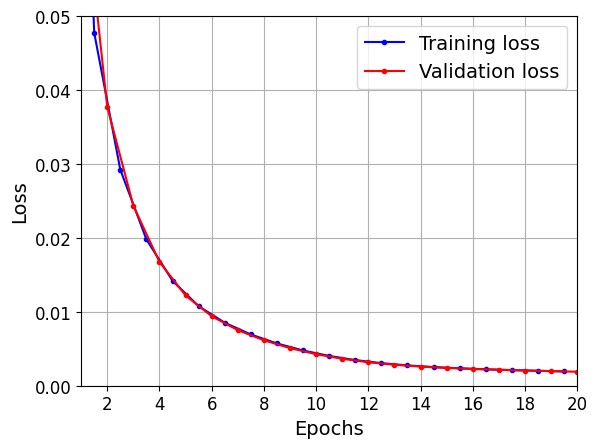

In [10]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [11]:
y_pred = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


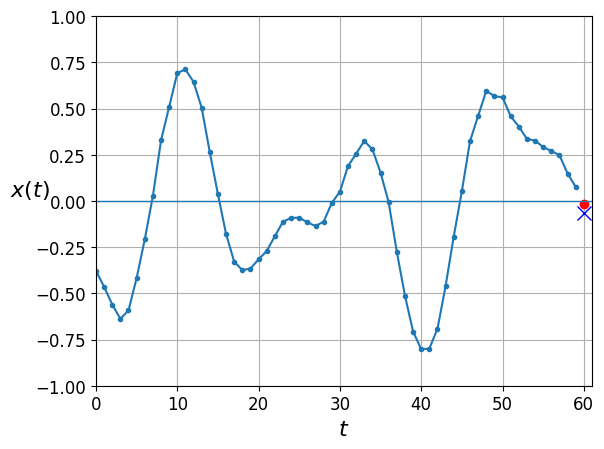

In [12]:
plot_series(X_test[15, :, 0], y_test[15, 0], y_pred[15, 0])
plt.show()

## Isa's Part Starts here

In [18]:
import numpy as np, tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

# Ensure shapes are [N, 60, 1]
def to_rnn_shape(X):  # X is [N, 60]
    X = np.asarray(X, dtype=np.float32)
    if X.ndim == 2:  # [N, 60]
        X = X[..., np.newaxis]  # -> [N, 60, 1]
    return X

X_train_rnn = to_rnn_shape(X_train)
X_valid_rnn = to_rnn_shape(X_valid)
X_test_rnn  = to_rnn_shape(X_test)

y_train = np.asarray(y_train, dtype=np.float32)
y_valid = np.asarray(y_valid, dtype=np.float32)
y_test  = np.asarray(y_test,  dtype=np.float32)

BATCH = 256
AUTOTUNE = tf.data.AUTOTUNE

def make_ds(X, y, training=False):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if training:
        ds = ds.shuffle(8192, reshuffle_each_iteration=True)
    ds = ds.batch(BATCH).prefetch(AUTOTUNE)
    return ds

train_ds = make_ds(X_train_rnn, y_train, training=True)
valid_ds = make_ds(X_valid_rnn, y_valid)
test_ds  = make_ds(X_test_rnn,  y_test)

## Strong RNN Baseline

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    inputs = keras.Input(shape=(60, 1))

    # Light feature extractor before RNN (helps the GRU)
    x = layers.Conv1D(32, 5, padding="causal", activation="relu")(inputs)
    x = layers.Conv1D(32, 5, padding="causal", activation="relu")(x)

    # Bidirectional GRU (captures forward + backward context)
    x = layers.Bidirectional(layers.GRU(64, return_sequences=False))(x)

    # Regularization & final regression head
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(1, activation="linear")(x)

    model = keras.Model(inputs, outputs, name="rnn_forecaster")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=3e-3, clipnorm=1.0),
        loss="mse",
        metrics=[keras.metrics.MeanSquaredError(name="mse")]
    )
    return model

model = build_model()
model.summary()

Model: "rnn_forecaster"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 60, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 60, 32)         │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 128)            │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,297 (200.38 KB)

 Trainable params: 51,297 (200.38 KB)

 Non-trainable params: 0 (0.00 B)

## Training with Callbacks

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(42)

def build_model():
    inp = layers.Input(shape=(60, 1))

    # Keep it simple: one BiLSTM for context, one LSTM to summarize
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inp)
    x = layers.LSTM(32, return_sequences=False)(x)

    # Small head
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(0.05)(x)   # light regularization
    out = layers.Dense(1)(x)

    model = keras.Model(inp, out, name="bilstm_lstm_minimal")
    model.compile(
        optimizer=keras.optimizers.Adam(5e-4),  # smaller LR than before
        loss="mse",
        metrics=["mse"],
    )
    return model

model = build_model()
model.summary()

# Callbacks: more patience, gentler LR decay
cbs = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_mse", factor=0.5, patience=6, min_lr=1e-6, verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_mse", patience=18, restore_best_weights=True, verbose=1
    ),
]

# Slightly larger batch often helps this dataset
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=220,              # ES will stop early
    callbacks=cbs,
    verbose=2,
)

print("\nEvaluate on TEST:")
test_loss, test_mse = model.evaluate(test_ds, verbose=0)
print(f"RNN test MSE: {test_mse:.6f}")
print("Baseline (linear) MSE from handout: 0.001780")

Model: "bilstm_lstm_minimal"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 60, 128)        │        33,792 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,489 (216.75 KB)

 Trainable params: 55,489 (216.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/220
36/36 - 3s - 93ms/step - loss: 0.1051 - mse: 0.1051 - val_loss: 0.0604 - val_mse: 0.0604 - learning_rate: 5.0000e-04
Epoch 2/220
36/36 - 0s - 14ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0164 - val_mse: 0.0164 - learning_rate: 5.0000e-04
Epoch 3/220
36/36 - 1s - 15ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0076 - val_mse: 0.0076 - learning_rate: 5.0000e-04
Epoch 4/220
36/36 - 1s - 18ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0033 - val_mse: 0.0033 - learning_rate: 5.0000e-04
Epoch 5/220
36/36 - 1s - 34ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0023 - val_mse: 0.0023 - learning_rate: 5.0000e-04
Epoch 6/220
36/36 - 0s - 13ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0028 - val_mse: 0.0028 - learning_rate: 5.0000e-04
Epoch 7/220
36/36 - 0s - 14ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0024 - val_mse: 0.0024 - learning_rate: 5.0000e-04
Epoch 8/220
36/36 - 0s - 13ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0016 - val_mse: 0.0